In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import linear_model

## Loading Dataframes

In [2]:
#reading  data
df= pd.read_excel('Data_file.xlsx',header=2)


In [3]:
#displaying data - top 5 rows of the dataset using head()

df.head()

,S.No.,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,1,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.576531
1,2,Tier 2,Executive,Metro,57081,1,84,18,68005.870631
2,3,Tier 2,Executive,Metro,60347,2,52,28,76764.020277
3,4,Tier 3,Executive,Metro,49010,2,81,33,82092.386880
4,5,Tier 3,Executive,Metro,57879,4,74,32,73878.097729


In [4]:
#describing the training dataset.
df.describe()

,S.No.,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,669.500000,55581.762332,2.525411,59.890882,39.207025,75459.338993
std,386.391641,6685.600553,1.123502,14.894696,14.049960,12551.280263
min,1.000000,36990.000000,1.000000,35.000000,18.000000,53020.319026
25%,335.250000,50547.000000,2.000000,47.000000,27.000000,66905.070033
50%,669.500000,55293.500000,3.000000,60.000000,39.000000,73112.640487
75%,1003.750000,60150.500000,4.000000,73.000000,51.000000,80747.178420
max,1338.000000,77911.000000,4.000000,85.000000,64.000000,123416.994271


In [5]:
#Displaying information about the training dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.No.                 1338 non-null   int64  
 1   College               1338 non-null   object 
 2   Role                  1338 non-null   object 
 3   City type             1338 non-null   object 
 4   Previous CTC          1338 non-null   int64  
 5   Previous job changes  1338 non-null   int64  
 6   Graduation marks      1338 non-null   int64  
 7   Exp (Months)          1338 non-null   int64  
 8   CTC                   1338 non-null   float64
dtypes: float64(1), int64(5), object(3)
memory usage: 94.2+ KB


In [6]:
#dropping 'S.No.' column as python has automatic indentation.

del df["S.No."]


In [7]:
df.head()

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.576531
1,Tier 2,Executive,Metro,57081,1,84,18,68005.870631
2,Tier 2,Executive,Metro,60347,2,52,28,76764.020277
3,Tier 3,Executive,Metro,49010,2,81,33,82092.386880
4,Tier 3,Executive,Metro,57879,4,74,32,73878.097729


In [8]:
df.shape

(1338, 8)

In [9]:
#displaying summary of the dataset

df.describe()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,55581.762332,2.525411,59.890882,39.207025,75459.338993
std,6685.600553,1.123502,14.894696,14.049960,12551.280263
min,36990.000000,1.000000,35.000000,18.000000,53020.319026
25%,50547.000000,2.000000,47.000000,27.000000,66905.070033
50%,55293.500000,3.000000,60.000000,39.000000,73112.640487
75%,60150.500000,4.000000,73.000000,51.000000,80747.178420
max,77911.000000,4.000000,85.000000,64.000000,123416.994271


## Exploratory Data Analysis

In [10]:
#grouping data according to college tier

collegedf = df.groupby("College").sum()
collegedf.head()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
College,,,,,
Tier 1,35670161,1667,39026,25546,5.035953e+07
Tier 2,21155512,925,21894,14174,2.715483e+07
Tier 3,17542725,787,19214,12739,2.345024e+07


In [11]:
#grouping data according to roles

roledf = df.groupby("Role").sum()
roledf.head()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
Role,,,,,
Executive,59062466,2695,63607,41906,7.605178e+07
Manager,15305932,684,16527,10553,2.491281e+07


Text(0, 0.5, 'CTC')

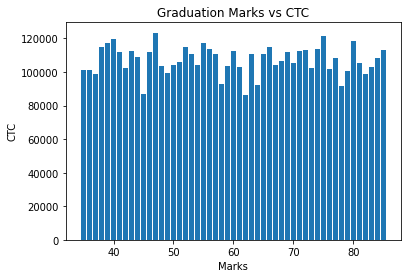

In [12]:
#displaying data as a bar plot with respect to Graduation Marks

x = df["Graduation marks"]      #assigning X-Axis values
y = df["CTC"]                   #assigning Y-Axis values
plt.bar(x,y)                            #using bar plot to make a bargraph
plt.title("Graduation Marks vs CTC")
plt.xlabel("Marks")
plt.ylabel("CTC")

Text(0, 0.5, 'CTC')

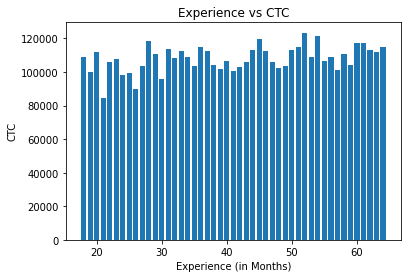

In [13]:
#displaying data as a bar plot with respect to Experience

x = df["Exp (Months)"]
y = df["CTC"]
plt.bar(x,y)
plt.title("Experience vs CTC")
plt.xlabel("Experience (in Months)")
plt.ylabel("CTC")

## Converting Categorial Variables to Numerical Variables


In [14]:
#Converting by using get_dummies

df =pd.get_dummies(df, drop_first=True)
df.head()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,College_Tier 2,College_Tier 3,Role_Manager,City type_Non-Metro
0,55523,3,66,19,71406.576531,0,0,1,1
1,57081,1,84,18,68005.870631,1,0,0,0
2,60347,2,52,28,76764.020277,1,0,0,0
3,49010,2,81,33,82092.386880,0,1,0,0
4,57879,4,74,32,73878.097729,0,1,0,0


array([[<Axes: title={'center': 'Previous CTC'}>,
        <Axes: title={'center': 'Previous job changes'}>,
        <Axes: title={'center': 'Graduation marks'}>],
       [<Axes: title={'center': 'Exp (Months)'}>,
        <Axes: title={'center': 'CTC'}>,
        <Axes: title={'center': 'College_Tier 2'}>],
       [<Axes: title={'center': 'College_Tier 3'}>,
        <Axes: title={'center': 'Role_Manager'}>,
        <Axes: title={'center': 'City type_Non-Metro'}>]], dtype=object)

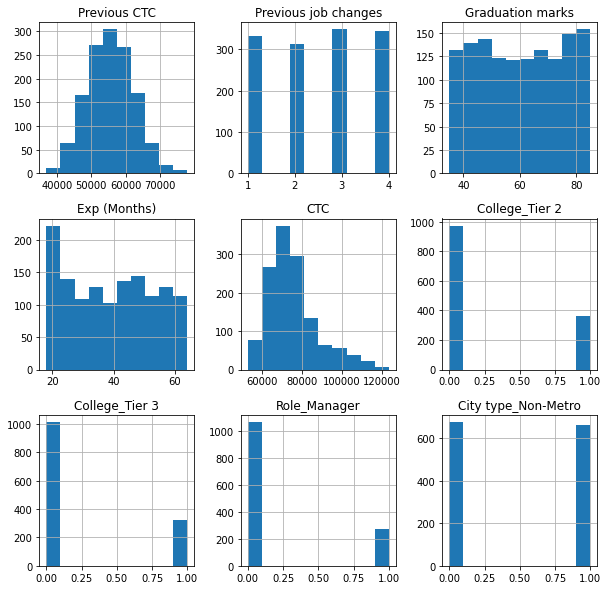

In [15]:
plt.rcParams['figure.figsize']=(10,10)
plt.rcParams['font.size']=(10)
df.hist()


<Axes: xlabel='Graduation marks', ylabel='Previous job changes'>

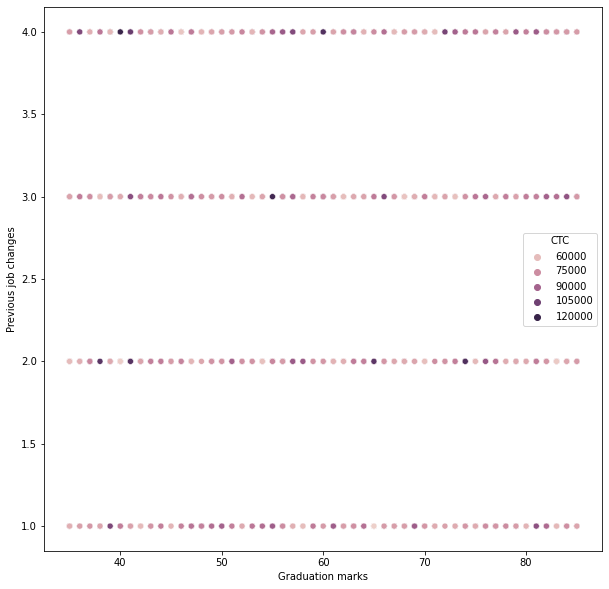

In [16]:
sns.scatterplot(x='Graduation marks',y='Previous job changes',hue='CTC',data=df)

array([[<Axes: xlabel='Previous CTC', ylabel='Previous CTC'>,
        <Axes: xlabel='Graduation marks', ylabel='Previous CTC'>,
        <Axes: xlabel='Role_Manager', ylabel='Previous CTC'>,
        <Axes: xlabel='Exp (Months)', ylabel='Previous CTC'>,
        <Axes: xlabel='CTC', ylabel='Previous CTC'>],
       [<Axes: xlabel='Previous CTC', ylabel='Graduation marks'>,
        <Axes: xlabel='Graduation marks', ylabel='Graduation marks'>,
        <Axes: xlabel='Role_Manager', ylabel='Graduation marks'>,
        <Axes: xlabel='Exp (Months)', ylabel='Graduation marks'>,
        <Axes: xlabel='CTC', ylabel='Graduation marks'>],
       [<Axes: xlabel='Previous CTC', ylabel='Role_Manager'>,
        <Axes: xlabel='Graduation marks', ylabel='Role_Manager'>,
        <Axes: xlabel='Role_Manager', ylabel='Role_Manager'>,
        <Axes: xlabel='Exp (Months)', ylabel='Role_Manager'>,
        <Axes: xlabel='CTC', ylabel='Role_Manager'>],
       [<Axes: xlabel='Previous CTC', ylabel='Exp (Months)'>,


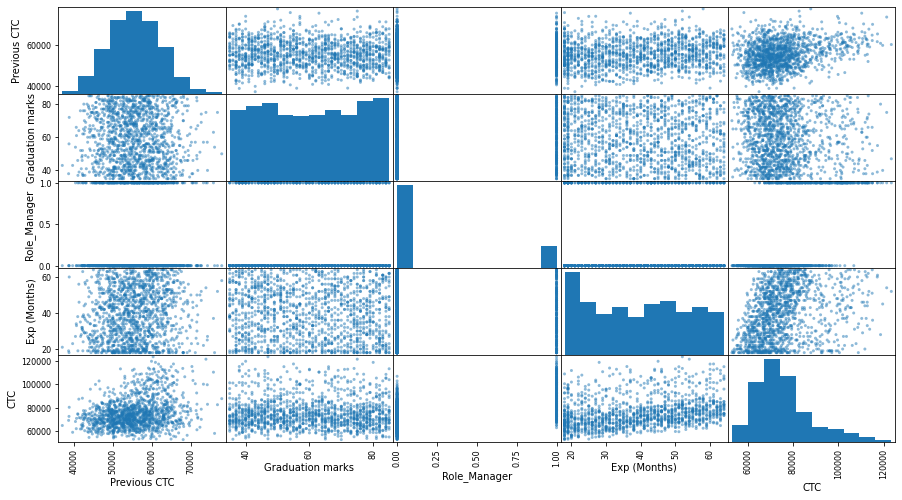

In [17]:
from pandas.plotting import scatter_matrix
plt.rcParams['figure.figsize']=(15,8)
plt.rcParams['font.size']=(10)
attribute_list=['Previous CTC', 'Graduation marks', 'Role_Manager', 'Exp (Months)','CTC']
scatter_matrix(df[attribute_list])

In [18]:
corr_matrix=df.corr()
corr_matrix['CTC']

Previous CTC            0.270260
Previous job changes    0.007518
Graduation marks       -0.017557
Exp (Months)            0.301569
CTC                     1.000000
College_Tier 2         -0.041814
College_Tier 3         -0.149194
Role_Manager            0.625435
City type_Non-Metro    -0.211258
Name: CTC, dtype: float64

In [19]:
corr_matrix['CTC']

Previous CTC            0.270260
Previous job changes    0.007518
Graduation marks       -0.017557
Exp (Months)            0.301569
CTC                     1.000000
College_Tier 2         -0.041814
College_Tier 3         -0.149194
Role_Manager            0.625435
City type_Non-Metro    -0.211258
Name: CTC, dtype: float64

<Axes: >

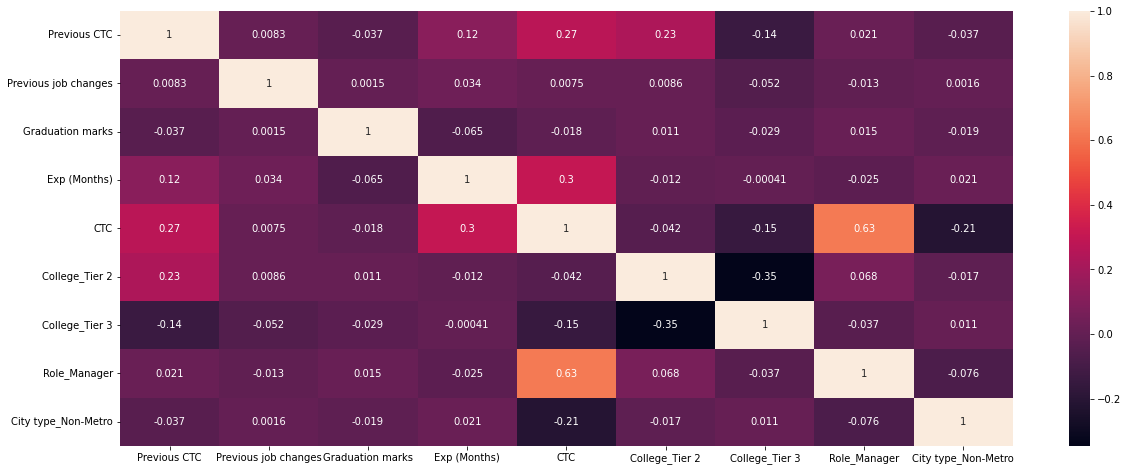

In [20]:
plt.rcParams['figure.figsize']=(20,8)
sns.heatmap(corr_matrix, annot=True)

## Splitting the dataset into train and test by random sampling.

In [21]:
from sklearn.model_selection import train_test_split #random sampling
x_train, x_test=train_test_split(df, random_state = 42, test_size=0.2)

In [22]:
X_train = x_train.drop("CTC", axis = 1) #features
Y_train = x_train["CTC"] #labels
X_test = x_test.drop("CTC", axis=1)
Y_test=x_test["CTC"]

In [23]:
n,d = X_train.shape
print('number of data points: ' , n)
print('number of features: ',d)


number of data points:  1070
number of features:  8


In [24]:
Y_train.shape

(1070,)

In [25]:
X_train.isna().sum() #check for null values in the training data

Previous CTC            0
Previous job changes    0
Graduation marks        0
Exp (Months)            0
College_Tier 2          0
College_Tier 3          0
Role_Manager            0
City type_Non-Metro     0
dtype: int64

In [26]:
X_test.isna().sum() 

Previous CTC            0
Previous job changes    0
Graduation marks        0
Exp (Months)            0
College_Tier 2          0
College_Tier 3          0
Role_Manager            0
City type_Non-Metro     0
dtype: int64

## Training Linear Regression Model

In [27]:
#importing Linear Regression from the sklearn library

from sklearn.linear_model import LinearRegression 
reg = LinearRegression()

In [28]:
#fitting the data

reg.fit(X_train,Y_train)

LinearRegression()

In [29]:
y_prd_train = reg.predict(X_train)
print("CTC Predictions for training data:", y_prd_train)

CTC Predictions for training data: [65134.2899553  73075.86099668 67201.92496464 ... 79964.49845796
 99521.44966727 81281.54920957]


In [30]:
y_prd_test = reg.predict(X_test)
print("CTC Predictions for test data:", y_prd_test)

CTC Predictions for test data: [ 73050.92401787  65992.53095389  89563.75060484  69934.78067919
  84281.58109686  78475.91167892  56861.04381441  80859.70121536
  62916.41298483  73073.21623378  88151.04252529  71790.854176
  65807.28638103  98492.28669423  99303.81612372  94975.5748558
  74488.96103505  90793.03988606  67222.02824383  88112.35535469
  67233.37998678  77384.82363632  72387.75662368  71773.21122708
  70387.01331329  78455.61258706  81176.37446239  64239.29254475
  72976.63030903  67424.63615829  72888.97433842  71427.57812436
  64715.12534067  62002.9782379   72062.31214     83682.82057529
  67112.65831501  70451.87821416  87610.1619993   91993.58062701
  64389.54829161  65288.48917353  77900.45871467  74510.58830015
  72695.30921422  79711.88735535  65205.73410299  63477.84576273
  93755.41852645  74322.94544247  74270.58007651  63514.19925823
  71284.20149061  69312.79989812  76660.42110836  80393.69909093
  71944.91418968  88407.37107333  77250.42333474  77405.820873

## Evaluating Results

In [31]:
#importing Mean Squared Error Metric from sklearn library

from sklearn.metrics import mean_squared_error

In [32]:
#calculating and printing Mean Squared Error

print('Mean Squared Error on training data:', mean_squared_error(Y_train, y_prd_train))

Mean Squared Error on training data: 60633377.141739875


In [33]:
print('Mean Squared Error on test data:', mean_squared_error(Y_test, y_prd_test))

Mean Squared Error on test data: 66333575.64101524


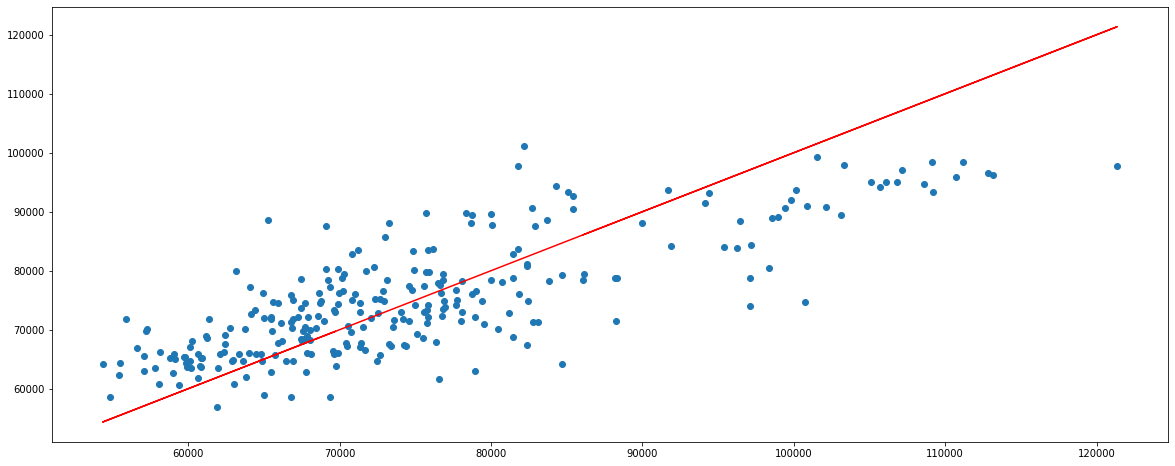

In [34]:
plt.scatter(Y_test, y_prd_test)
plt.plot(Y_test, Y_test,'r-')

plt.show()

Since the MSE for both training and test is the same, we are in good shape.

## Predicting

In [35]:
X_test

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),College_Tier 2,College_Tier 3,Role_Manager,City type_Non-Metro
764,55085,1,59,45,0,0,0,1
887,54712,1,49,36,0,1,0,1
890,47495,4,38,64,0,1,1,1
1293,47404,4,66,46,0,1,0,0
259,53080,3,68,19,0,1,1,0
...,...,...,...,...,...,...,...,...
109,59099,2,67,63,1,0,1,0
575,55470,3,36,58,0,1,0,1
535,56981,1,35,38,0,0,0,0
543,73856,1,75,54,1,0,1,1


In [36]:
x_test['Predicted CTC linear regression']=y_prd_test

In [38]:
x_test[['CTC','Predicted CTC linear regression']]


,CTC,Predicted CTC linear regression
764,69720.352029,73050.924018
887,64010.158614,65992.530954
890,80020.806072,89563.750605
1293,68071.370691,69934.780679
259,97151.377521,84281.581097
...,...,...
109,103305.295869,97884.334631
575,68557.783416,72355.601269
535,68630.855235,76266.398024
543,121362.729686,97726.910871


We can see from the above Actual CTC and Predicted CTC columns that the actual and predicted values are very close.


## Picking a different model - Decision Tree Regressor

In [39]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()
tree_reg.fit(X_train, Y_train)

DecisionTreeRegressor()

In [40]:
y_prediction_train = tree_reg.predict(X_train)
mean_squared_error(Y_train, y_prediction_train)

0.0

In [41]:
y_prediction_test = tree_reg.predict(X_test)
mean_squared_error(Y_test, y_prediction_test)

105480432.95487985

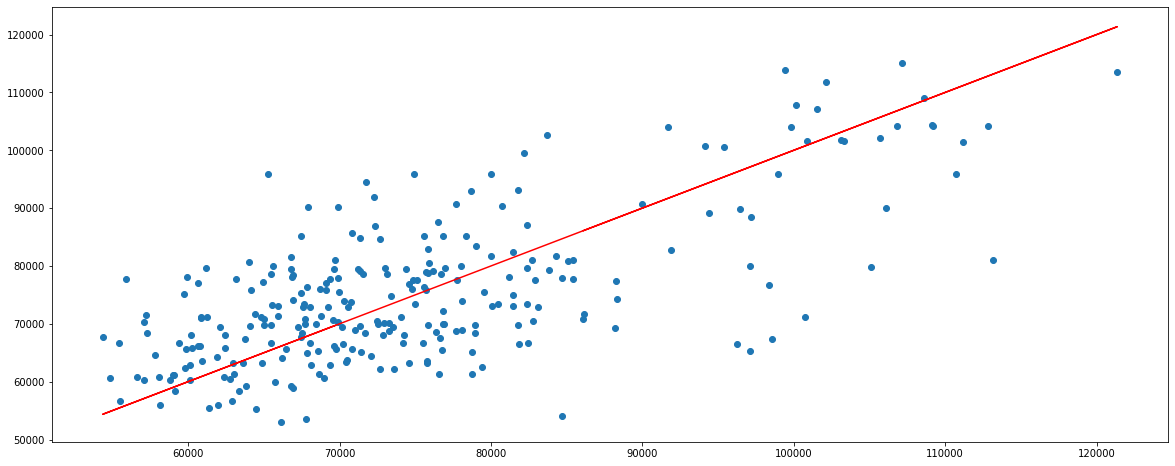

In [42]:
plt.scatter(Y_test, y_prediction_test)
plt.plot(Y_test, Y_test,'r-')

plt.show()

In [43]:
x_test['CTCpredicted decision tree regressor'] = y_prediction_test
x_test[['CTCpredicted decision tree regressor','CTC','Predicted CTC linear regression']]

,CTCpredicted decision tree regressor,CTC,Predicted CTC linear regression
764,80991.209078,69720.352029,73050.924018
887,80699.818763,64010.158614,65992.530954
890,81697.601745,80020.806072,89563.750605
1293,66654.114845,68071.370691,69934.780679
259,88400.482744,97151.377521,84281.581097
...,...,...,...
109,101556.338348,103305.295869,97884.334631
575,65218.685019,68557.783416,72355.601269
535,61396.479407,68630.855235,76266.398024
543,113508.797979,121362.729686,97726.910871


## Cross-validation 

In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
def display_scores(scores):
  print('scores:',scores)
  print('Mean:' , scores.mean())
  print('Standard Deviation:' , scores.std())

In [46]:
scores_lin=cross_val_score(reg,X_train,Y_train, scoring = 'neg_mean_squared_error', cv=10)
line_reg_mse_scores_lin= -scores_lin
display_scores(line_reg_mse_scores_lin)

scores: [64798462.51812065 71178567.33529893 41907170.70875963 66001998.47520924
 54233736.30778453 60902541.97590794 74494482.09162503 61932215.57204165
 66755991.04610262 55992497.66175978]
Mean: 61819766.369261004
Standard Deviation: 8876012.102249544


In [47]:
scores_dec=cross_val_score(tree_reg,X_train,Y_train, scoring = 'neg_mean_squared_error', cv=10)
line_reg_mse_scores_dec= -scores_dec
display_scores(line_reg_mse_scores_dec)

scores: [8.09249785e+07 1.15453464e+08 7.14922241e+07 1.07807720e+08
 1.12248438e+08 9.55913935e+07 9.70155860e+07 1.17689270e+08
 7.98953975e+07 1.42102984e+08]
Mean: 102022145.48494107
Standard Deviation: 20257251.481554028


Confidence interval

In [48]:
from scipy import stats
confidence = 0.95
squared_error=(y_prd_test - Y_test)**2
stats.t.interval(confidence, len(squared_error)-1, loc= squared_error.mean(), scale=stats.sem(squared_error))


(54557091.39210376, 78110059.88992672)